# Homework: Gram-Schmidt with Piecewise-Constant Signals


Suppose a real signal set consists of signals that are all piecewise constant on each interval that is bounded by two consecutive integres. I.e., if $\mathcal{S}= \left\{ s_i(t) \right\}$, then $\forall s_i(t) \in \mathcal {S}$,

$$
s_i(t) = c_{ij}, ~~~ \forall j \le t < j+1, \forall j \in \mathbb{Z}
$$

for some real constants $c_{ij}$.

Then we can write $s_i(t)$ as 

$$
s_i(t) = \sum_j c_{ij} p_1(t-j),
$$
Assuming $s_i(t)$ is causal, let $\mathbf{c}_i = \left[ c_{i,0} c_{i,1} ... \right]$.

The energy (norm-squared) of $s_i(t)$ is then

\begin{align*}
s_{t}^{2} (t) &= \int \sum_j  c_{ij}  p_1(t-j) \sum_k c_{ik}  p_1( t-k) ~dt\\
&= \int \sum_j \sum_k c_{ij} c_{ik}  p_1(t-j) p_1( t-k)  ~dt\\
&= \sum_j c_{ij}^2 \int  p_1(t-j) ~ dt \\
&= \sum_j c_{ij}^2 \\
&= \left| \mathbf{c}_i \right|^2,
\end{align*}
where we used the fact that $p_1(t-j)p_1(t-k) =0$ for all $j \ne k$.

Note also that if two signals $f(t)$ and $g(t)$ are piecewise continuous on each interval with integer boundaries, with coefficient vectors $\mathbf{f}$ and $\mathbf{g}$, respectively, then 

\begin{align*}
\left< f(t), g(t) \right> &= \int \sum_i f_i p_1 (t-i) \sum_j g_j p_1(t-j) ~dt \\
&= \int \sum_i f_i p_1 (t-i) \sum_j g_j p_1(t-j) ~dt \\
&= \sum_i f_i g_i \int  p_1(t-i)~ dt \\
&= \left<\mathbf{f}, \mathbf{g} \right>.
\end{align*}

What this means is that if we have such signals, that instead of doing lots of integrals to compute the basis functions and representations in Gram-Schmidt, we can just do the same math on the vectors of coefficients.

Let's do an example about working with the vector representations of such functions, and we will try to learn something else along the way.

Start by importing some libraries we will need:

In [1]:
import numpy as np
from numpy.linalg import norm 

import matplotlib.pyplot as plt
%matplotlib inline

Next I am providing a function to plot the functions from their vector representations:

In [2]:
def plotsig( vector ):
    n=len(vector)
    t=range(n +2)
    plt.step(t, np.hstack( ([0], vector, [0])) )
    plt.xlim(0, n+0.001)
    ax=plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

Now, suppose we have the signals given by the rows of this matrix:

In [3]:
s= np.array([
    [ 1, 1, 0], # s0(t)
    [ 1, 2, 1], # s1(t)
    [ 1, 0, -1] # s2(t)
])

Here are the plots of the functions represented by the rows of this matrix:

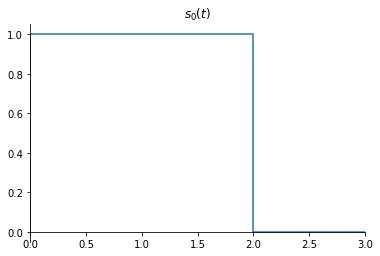

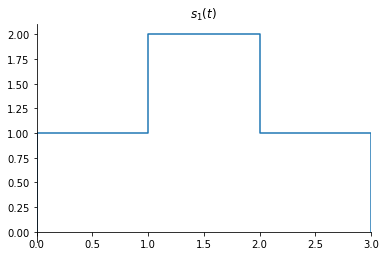

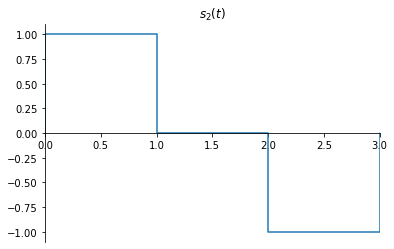

In [4]:
for i in range(3):
    plt.figure()
    plt.title(f'$s_{i}(t)$')
    plotsig(s[i])

Let's not do Gram-Schmidt at first. Let's see what happens if we guess that the basis is the rows of this matrix:

In [5]:
f = np.array([
    [1, 0, 0], # f0
    [0, 1, 0], # f1
    [0, 0, 1]  # f2
])
    

The rows are the three "chips" that these waveforms are built out of. Here are the plots of these three functions:

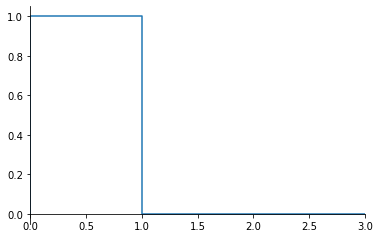

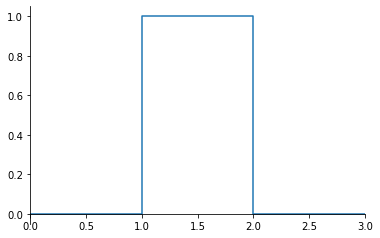

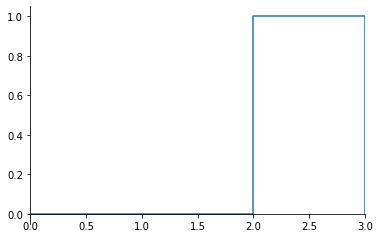

In [6]:
for i in range(3):
    plt.figure()
    plotsig(f[i])

We can easily check that the rows are orthonormal by doing all the inner (dot) products $f_i \cdot f_j$ for all $i$ and $j$, which can most easily be implemented as matrix multiplication:

In [7]:
f @ f.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Since we got an identity matrix, the rows are orthonormal.

Now let's get the representations of the $s_i$ in terms of the $f_i$. We need to get the inner (dot) product of each $s_i$ with each $f_j$, and we can again do it via matrix multiplication:

In [8]:
s_rep = s @ f.T
print(s_rep)

[[ 1  1  0]
 [ 1  2  1]
 [ 1  0 -1]]


Since the $f_i$ are the chips, we can see that the representation of each $\mathbf{s}_i$ is just the vector $\mathbf{s}_i$ itself.

But do the rows of `f` form a basis? How can we check? 

We can check by seeing to see how many linearly independent rows the representation matrix has:


In [9]:
np.linalg.matrix_rank(s_rep)

2

Note that we could have also checked the rank of the original matrix (in this example, they are the same!) to determine how many basis functions will be required.

If you find your chosen set of functions is not minimal (not a basis) and you need to know the true dimensionality, you can:
* Try to choose a different set of orthonormal functions based on the signal -- for instance, $s_1(t)$ and $s_2(t)$ are orthogonal, and so are a linearly independent set of cardinality 2.  We should be able to normalize those  and use the resulting functions to span the whole set (see below).
* Just do the Gram-Schmidt procedure in any order that is convenient.

## Problems

### 1. Apply the Gram-Schmidt procedure on this signal set in the order $s_1, s_2, s_3$.

a) Find the vector form of each basis function and plot the basis functions.

b) Use matrix multiplication to show that the basis functions are orthonormal.

c) Find the coefficents $s_{ij}$ to represent each signal as a linear combination of the basis functions.

d) Confirm that the norms and inner products of the signal-space representation are the same as the original signals.

### 2. Apply the Gram-Schmidt procedure on this signal set in the order $s_0, s_1, s_2$.

a) Find the vector form of each basis function and plot the basis functions.

b) Use matrix multiplication to show that the basis functions are orthonormal.

c) Find the coefficents $s_{ij}$ to represent each signal as a linear combination of the basis functions.

d) Confirm that the norms and inner products of the signal-space representation are the same as the original signals.

### 3. Now consider the signals that have vector coefficients in the rows of the matrix s2:

In [10]:
s2=np.vstack((
    np.array([ 4,4, 3,3, 0,0, 3,3, 4,4]),
    np.array([ 4,4, 3,3, 0,0, -3,-3, -4,-4]),
    np.sqrt(2)*np.array([ 4,4, 3,3, 0,0, 0,0, 0,0]),
    np.sqrt(2)*np.array([ 0,0, 0,0, 0,0, -3,-3, -4,-4])
))
s2

array([[ 4.        ,  4.        ,  3.        ,  3.        ,  0.        ,
         0.        ,  3.        ,  3.        ,  4.        ,  4.        ],
       [ 4.        ,  4.        ,  3.        ,  3.        ,  0.        ,
         0.        , -3.        , -3.        , -4.        , -4.        ],
       [ 5.65685425,  5.65685425,  4.24264069,  4.24264069,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -4.24264069, -4.24264069, -5.65685425, -5.65685425]])

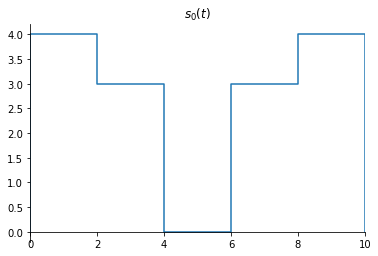

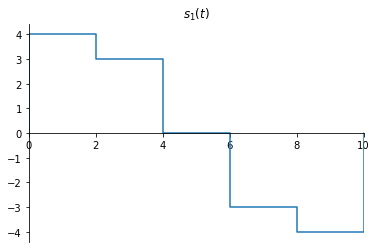

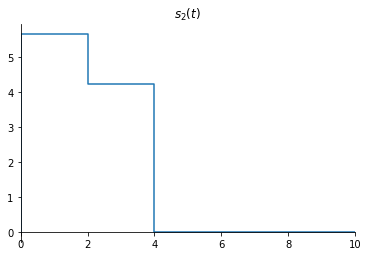

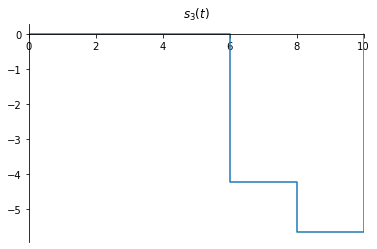

In [11]:
for k in range(4):
    plt.figure()
    plt.title(f'$s_{k}(t)$')
    plotsig(s2[k])

a) Determine if the functions with coefficients in the rows of the following matrix form a basis. If not, determine the dimensionality of this signal set.

b) Find a basis for this signal set by performing the Gram-Schmidt procedure in the order $s0, s1, s2, s3$. Give the representation for each signal and plot a signal constellation.

c) Find a basis for this signal set by performing the Gram-Schmidt procedure in the order $s2, s3, s0, s1$. Give the representation for each signal and plot a signal constellation.

### 4. Analyze the following signals.

The file `signals.pkl` is a Python 3.x pickle file that contains a
    single dictionary of key/value pairs, with the keys being the
    names of the variables mentioned below matched to the
    corresponding arrays.

  Each of the variables in the data file, except for $S$, consists of
  a matrix whose rows represent signals.  The variable $S$ is also a
  matrix, but its rows represent signals that are to be used as a
  basis in part (f).

  The parts below ask you to find the signal-space representation for
  each signal set. The easiest way to do this (other than using some
  existing code that to do Gram-Schmidt or equivalent) is to write
  a function to do the Gram-Schmidt orthogonalization procedure.
  The procedure should output both the
  orthonormal basis functions and the vector representations of each
  signal.  **Do not just use a direct call to the QR decomposition.
  Also, I know there are many Gram-Schmidt procedures written in
    MATLAB on the web.  Please do not use those.  Do your own work
    independently. This is not hard because you are just iterating over
    the signals and finding the procedure (much like in the example and problems
    above). Also, most of the versions on
    the web require that the signal set be of the same size as the
    basis.  That is not true for some of the signals that you will be
    asked to process.**

  Note that Python uses floating point numbers to represent
  quantities that might not have a finite-bit floating point
  representation.  Thus some mathematical errors will arise and may
  cause difficulty as you implement the algorithm.  For the purposes
  of this algorithm, I suggest you treat an inner product as 0 if the
  value is less than 0.01.  Otherwise, you will end up with some
  really small values assigned to inner products that would have been
  zero with infinite-precision math.


**a)** For each signal set, run it through your algorithm, specify
    the dimensionality of the signal set, and give the vector
    representation of each signal.

**b)** Compare the vector representations of signal sets $A$ and $B$.  What do you observe?  Explain any similarities or differences.
    Did you notice these before running the Gram-Schmidt procedure?

**c)** Plot the signal constellation for signal set $P$.
    Look at the signal constellation and plots of the original signals -- which features 
    are varied across different signals?
    What properties can you observe about this
    signal set from the signal space representation?  How many correlators
    would the demodulator need to optimally detect this signal set?

**d)**   Look at the signal-space representation and the plots of the original signals for signal set $F$ -- which features 
    are varied across different signals? What properties can you observe about this
    signal set from the signal space representation?  How many
    correlators would the demodulator need to optimally detect this
    signal set?

**e)** Find the signal-space representation of signal set $Q$ and plot the signal constellation.
    Look at the signal constellation and plots of the original signals -- which features 
    are varied across different signals? What properties can you observe about this signal
    set from the signal space representation?  How many correlators
    would the demodulator need to optimally detect this signal set?

**f)** Modify your Gram-Schmidt algorithm to allow you to specify a set
    of basis waveforms.  I.e., the new algorithm will only find the 
    vector representations of each signal.  Run the new algorithm on
    the signal set $Q$ when the rows of $S$ are used as the basis.  Plot
    the signal constellation.
    
 

In [12]:
import pickle

In [13]:
pf = open ('signals.pkl', 'rb')

In [14]:
data=pickle.load(pf)

In [15]:
data.keys()

dict_keys(['S', 'A', 'B', 'C', 'Q', 'F', 'P'])

In [16]:
S = data['S']; A = data['A']; B = data['B']; C = data['C']
Q = data['Q']; F = data['F']; P = data['P']